# Utilisation des terres par région réceptrices pour répondre à eur consommation finale entre 1995 et 2022. (Importations)

#### Vocabulaire:

**Regions sources:** les régions qui utilisent une quantité de terres pour produire des biens destinés à la consommation finale, que ce soit pour leur propre consommation interne ou pour l'exportation vers d'autres régions.
Les cartes thermiques permettent de visualiser le niveau d'exploitation intensive des régions sources pour répondre aux besoins de production.

**Régions réceptrices:** les régions qui importent des biens qui ont nécessité l'utilisation de terres dans leur production. 
Les cartes thermiques permettent de visualiser les régions réceptrices qui dépendent des importations pour satisfaire leur propre consommation finale en biens nécessitant une utilisation intensive des terres.

**Importations de terres :** Les régions réceptrices importent des terres virtuellement à travers les biens qu'elles importent pour satisfaire leur propre consommation finale. Cela signifie que ces régions utilisent des ressources terrestres situées à l'extérieur de leurs frontières pour produire des biens consommés localement.

**Exportations de terres :** Les régions sources exportent des terres virtuelles en produisant des biens destinés à la consommation finale dans d'autres régions. Cela implique que ces régions utilisent leurs ressources terrestres internes pour produire des biens exportés vers d'autres régions.

Nous voulons dans cette partie examiner la part de la consommation finale pour chaque région réceptrices qui est satisfaite par la production locale et par la production externe associée à l'utilisation des terres. Cela permet d'analyser l'auto-suffisance et les dépendances externes de chaque région pour les productions utilisant les terres au cours du temps. Cela permet d'avoir un meilleur aperçu des régions qui ont la capacité de satisfaire une grande partie de leur consommation finale et de limiter leurs importations, mais met également en avant les régions qui dépendent économiquement d'autres régions pour répondre aux besoins de leur consommation finale.

In [4]:
#importations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.colors import LogNorm
from matplotlib.ticker import FuncFormatter
import imageio

Nous avons utilisé les bases de données en format CSV que nous avons obtenu lors du nettoyage des bases de données d'EXIOBASE3 entre 1995 et 2022 afin d'obtenir les DataFrames correspondant aux niveaux d'utilisations des terres par chaque région et destinés à la consommation finale que vous pouvez retrouver ici (mettre le lien).

Pour déterminer la part d'utilisation des terres externes et internes de chaque région réceptrice pour répondre à sa consommation finale, nous avons normalisé nos [DataFrames](https://github.com/MarDrd/exiobase3-manipulation/tree/main/Impact%20-%20Consommation%20Finale/LandUse%20-%20Consommation%20Finale/LandUse%20-%20Data) en suivant ces étapes :
1. Calculer la somme de chacune de nos colonnes, qui correspondent toutes à une région réceptrice de ce type de production.
2. Diviser chaque valeur de la colonne par la somme de cette même colonne.

Cette méthode nous permet d'obtenir la part de la consommation finale de chaque région qui est associée à la production nécessitant l'utilisation des terres, qu'elle soit importée ou produite localement.


In [5]:
#Fonction pour charger les bases de données cvs pour chaque année
def load(year):
    #Charger les bases de données csv
    df = pd.read_csv(f'C:\Master 1\exiobase3-manipulation\Impact - Consommation Finale\LandUse - Consommation Finale\LandUse_AllSectors\LandUse - Data\df_LandUse_{year}.csv')

    #Changer l'ordre des régions pour les lignes et les colonnes
    order = ["Afrique","Brésil","Amerique Latine et Caraïbes", "Indonésie", "Russie", "Inde",  "Australie", "Mexique", "Asie Pacifique",
             "Canada",  "Chine","Etats-Unis", "Europe", "Union européenne",  "Moyen-Orient",  "Japon"]
    df = pd.DataFrame(df, index=order)
    df = df[order]
    
    #Résultat de la fonction 'load'
    return df

#Dictionnaire vide pour stocker les DataFrame de la loop
data = {}

#Loop pour chaque année entre 1995 et 2022
for year in range(1995, 2023):

    #Charger les données pour une des années
    df_year = load(year)
    
    #Calculer la somme de chaque colonne de la DataFrame pour cette année
    df_year_imp = df_year.sum(axis=0)
    
    #Division de chaque éléments des colonnes par la somme obtenue précedemment et mettre en pourcentage
    df_year_norm = df_year.div(df_year_imp, axis=1) * 100
    
    #Stocker la DataFrame dans le dictionnaire
    data[year] = df_year_norm


#Boucle pour créer une heatmap pour chaque année
for year, df_norm in data.items():

    #Création d'astériques
    regions_ast = ["Afrique$^{1}$","Brésil","Amerique Latine\net Caraïbes$^{2}$", "Indonésie", "Russie", "Inde",  "Australie", "Mexique", 
                   "Asie Pacifique$^{3}$", "Canada",  "Chine","Etats-Unis", "Europe$^{4}$", "Union\neuropéenne$^{5}$",  "Moyen-Orient$^{6}$",  "Japon"]
    

    #Ajouter les astériques pour les lignes et les colonnes
    df_norm.columns = regions_ast
    df_norm.index = regions_ast

    #Label des lignes et colonnes
    df_norm.columns.name = "Région réceptrice d'utilisation des terres"
    df_norm.index.name = "Région source d'utilisation des terres"
    
    #Taille de la figure
    plt.figure(figsize=(30, 15))
    
    #Création d'une carte thermique des DataFrames
    sns.heatmap(df_norm, norm=LogNorm(vmin=0.8, vmax=97),
            annot=True, cmap='YlOrRd', linewidths=0.1,
            cbar_kws={"label": "Pourcentage d'utilisation des terres (terres agricoles, forêts, pâturages) externes et internes (%)",
                       "format": FuncFormatter(lambda x, _: f'{x:.0f}'), "ticks": range(10, 100, 10)})

    
    #Titre de la carte thermique
    plt.title(f"Utilisation des terres externes et internes de chaque région réceptrice pour répondre à leur consommation finale en {year}", fontsize=14, fontweight='bold', y=-0.09)
    
    #Permet d'ajuster la positions des éléments de la carte thermique
    plt.subplots_adjust(bottom=0.3)

    #Création des notes en bas de pages associées aux astériques
    plt.figtext(0.05, 0.07, '$^{1}$ Afrique hors Egypte.', fontsize=10)
    plt.figtext(0.05, 0.06, "$^{2}$ Amérique Latine et Caraïbes hors Brésil et Mexique", fontsize=10)
    plt.figtext(0.05, 0.05, "$^{3}$ Asie Pacifique hors Chine, Inde, Japon, Australie et Indonésie", fontsize=10)    
    plt.figtext(0.05, 0.04, "$^{4}$ Europe hors les pays membres de l'UE et Russie.", fontsize=10)
    plt.figtext(0.05, 0.03, "$^{5}$ Représente les 27 pays actuels de l'Union européenne, indépendamment de l'année représentée.", fontsize=10)
    plt.figtext(0.05, 0.02, '$^{6}$ Moyen-Orient hors Turquie.', fontsize=10)

    #Ajuster l'espacements des éléments de la carte thermique
    plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    
    #Sauvegarder la carte de thermique
    frame_filename = f"C:\Master 1\exiobase3-manipulation\Impact - Consommation Finale\LandUse - Consommation Finale\LandUse_AllSectors\LandUse - Heatmap\LandUse_Importation\df_Imp_{year}.png"
    plt.savefig(frame_filename, bbox_inches='tight')
    
    #Pour fermer la carte thermique
    plt.close()


In [6]:
#Initialisation : liste vide pour stocker les images créées
images = []

#Création d'une boucle pour chaque année du dictionnaire 'data'
for year in data.keys():
    frame_filename = f'C:\Master 1\exiobase3-manipulation\Impact - Consommation Finale\LandUse - Consommation Finale\LandUse_AllSectors\LandUse - Heatmap\LandUse_Importation\df_Imp_{year}.png'
    #Charge l'image et l'ajoute à la liste 'images'
    images.append(imageio.imread(frame_filename))

#Nom du fichier GIF
gif_filename = 'LandUse_FinalConso_Imp_Heatmap.gif'

#Création du GIF
imageio.mimsave(gif_filename, images, duration=1000, loop=0)

C:\Users\Marie\AppData\Local\Temp\ipykernel_15624\2788016184.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(frame_filename))


Nous pouvons facilement observer grâce à la diagonale que des régions telles que l'Afrique, le Brésil, l'Amérique Latine et les Caraïbes, la Russie, l'Inde et l'Australie utilise en grande majorité des terres internes afin de répondre à leur consommation finale de facon continue entre 1995 et 2022. Par exemple, en 1995, 97% des terres utilisés dans le processus de production destinés à la consommation finale était internes, contre 94% en 2022. Il en est de même pour le Brésil, dont la part des terres exploités pour répondre à la consommation finale était internes représente 93% en 1995 contre  91% en 2022.

A l'opposé certaines régions telle que le Japon, l'Europe et les Etats-Unis utilise en majorité des terres externes dans leur processus de production afin de répondre à leur consommation finale de façon continue entre 1995 et 2022. Par exemple, le Japon en 1995 n'utilisait que 8.5% de leur terres pour répondre à leur consommation finale, et utilisait 31% de terres d'Asie Pacifique, 14% celles du Canada, 17% celles des Etats-Unis et 9% celles de l'Australie. En 2022, le Japon a augmenté son utilisation de terres internes pour répondre à sa consommation finale de 12.5 point de pourcentage comparé à 1995 mais cette part reste faible, et utilise 24% des terres d'Asie Pacifique, 12% des terres d'Australie, 12% des terres des Etats-Unis et 5% des terres du Canada.
Il en est de même pour l'Union européenne, qui en 1995 utilisait uniquement 45% de ces terres pour répondre à sa consommation finale, et utilisait 21% des terres africaines, 8% des terres d'Asie Pacifique et 7% des terres d'Amérique Latine et des Caraïbes. En 2022, l'utilsation de terres internes de l'Union européenne pour répondre à leur consommation finale à diminué de 3 point de pourcentage comparé à 1995, et utlise 20% des terres africaines, 10% des terres d'Asie Pacifique et 5% d'Amérique Latine et des Caraïbes.

L'évolution la plus surprenant est celle du Moyen-Orient. En effet, en 1995 cette région utilise en majorité ces terres internes afin de répondre à sa propre consommation finale, à hauteurs de 61% de ces terres internes et utilise des terres externes telles que celles d'Asie Pacifique à hauteur de 7% et de  l'Afrique à hauteur de 5% chacune. Cependant, en 2022, la part des terres internes utilisés pour répondre à leur consommation finale diminue de 33 point de pourcentage comparé à 1995 pour tomber à 28%. De plus, la part des terres externes au Moyen-Orient utilisé pour répondre à leur consommation finale augmente fortement avec une augmentation de 4 point de pourcentage et de 16 point de pourcentage pour l'Asie Pacifique et l'Afrique respectivement.



### Evaluer les dépendances de chaque régions.

Afin d'avoir un meilleur aperçu de l'évolution de la part de la consommation finale associée à la production nécessitant l'utilisation des terres qui est importée ou produite localement entre 1995 et 2022, nous avons isolé les valeurs de la diagonale de chaque région. Ces valeurs correspondent à la part de la consommation finale de la région receptrice qui est satisfaite par l'utilisation des ses propres terres lors du processus de production. Une couleur rouge vif signifie que la région dépend faiblement des importations pour les productions issues de l'utilisation des terres, tandis qu'une couleur froide signifie que la région dépend fortement des importations pour répondre à son niveau de consommation finale.

In [7]:
#Création de la fonction 'load'
def load(year):
    #Charger les bases de données csv pour chaque année
    df = pd.read_csv(f'C:\Master 1\exiobase3-manipulation\Impact - Consommation Finale\LandUse - Consommation Finale\LandUse_AllSectors\LandUse - Data\df_LandUse_{year}.csv')
    
    #Liste définissant l'ordre des régions
    order = ["Afrique", "Brésil", "Amerique Latine et Caraïbes", "Indonésie", "Russie", "Inde", "Australie", "Mexique", "Asie Pacifique",
             "Canada", "Chine", "Etats-Unis", "Europe", "Union européenne", "Moyen-Orient", "Japon"]
         
    #Calculer la somme de chaque colonne de la DataFrame pour cette année         
    df_year_imp = df.sum(axis=0)
    
    #Division de chaque éléments des colonnes par la somme obtenue précedemment et mettre en pourcentage
    df_year_norm = df.div(df_year_imp, axis=1) * 100

    #Changer l'odre des régions qui pour les lignes et les colonnes avec la liste 'order'
    df1 = pd.DataFrame(df_year_norm, index=order)
    df1 = df1[order]
    
    #Extraire les valeurs de la diagonale
    diagonal_val = df1.values.diagonal()
    
    #Création d'une DataFrame avec les valeurs de la diagonale
    df_diag = pd.DataFrame(diagonal_val, index=order, columns=[f'{year}'])
    
    #Résultat de la fonction 'load'
    return df_diag

In [28]:
#Initialisation avec une liste vide
dfs_diag = []

#Boucle pour extraire les diagonales pour chaque années et en faire une DataFrame
for year in range(1995, 2023):
    df_diag = load(year)
    dfs_diag.append(df_diag)

#Merge toutes les DataFrame ensemble
df_diagonale = pd.concat(dfs_diag, axis=1)

#Afficher la DataFrame
df_diagonale

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Afrique,96.786605,97.308640,96.298843,96.577844,96.863123,96.739414,96.302496,95.191913,95.812744,95.569038,...,93.813656,94.048703,95.275866,95.099390,93.945406,94.004600,94.334366,94.282711,94.561800,94.491484
Brésil,92.740848,95.140189,94.362572,94.395430,95.535639,94.899351,95.622467,94.495256,95.560575,95.554221,...,91.861490,91.924200,91.535108,92.509791,92.507480,90.916159,91.209116,90.472607,90.319337,90.642772
Amerique Latine et Caraïbes,93.260883,90.655779,90.499796,89.637866,89.445850,90.126333,89.568309,89.060771,90.118357,88.826913,...,84.801724,85.692437,83.669153,86.298178,85.776297,85.443509,85.967738,85.469963,85.674468,85.685321
Indonésie,70.870250,67.887337,64.062760,63.139314,81.149440,82.976420,81.896663,82.521754,86.529792,82.215050,...,78.180699,79.644911,80.621928,81.171048,79.584784,76.896017,81.401729,81.185388,82.255931,83.509808
Russie,91.760558,95.915521,92.358203,94.063098,93.317540,91.131970,92.536699,92.798766,92.832652,91.122651,...,81.693532,87.777238,87.819413,85.964650,86.107345,84.303193,85.518199,85.043019,83.552684,82.906274
Inde,94.273837,89.464836,85.150720,82.270125,82.079046,88.571463,88.739952,87.074773,85.248028,86.163973,...,71.345641,73.221941,76.595652,77.263810,79.931879,80.444804,83.135115,82.410671,82.003067,82.042090
Australie,92.613776,92.732214,91.787796,92.650383,91.587317,91.663643,92.029718,91.493585,92.558382,89.258773,...,84.274335,83.979616,80.418129,82.852379,80.256294,77.118525,75.444286,74.176200,76.987188,76.158624
Mexique,87.844446,84.477995,82.427812,80.621243,78.098956,76.256056,74.155780,73.927181,76.099049,73.622062,...,79.074332,77.887912,74.723309,75.863799,77.392628,75.740476,76.300410,76.142417,75.210966,72.594513
Asie Pacifique,71.954577,69.874973,67.625003,70.934166,70.772357,68.900943,73.977852,72.682978,74.516538,68.319976,...,59.531354,65.804837,69.757757,69.573429,67.879272,67.087951,67.397863,68.426584,67.713901,67.136361
Canada,69.790199,81.035373,77.337304,75.660296,71.946204,78.855777,77.589607,81.918147,82.535760,82.512258,...,77.374633,72.727782,74.260737,71.666036,73.154160,69.745486,69.840898,67.348770,67.061497,67.015564


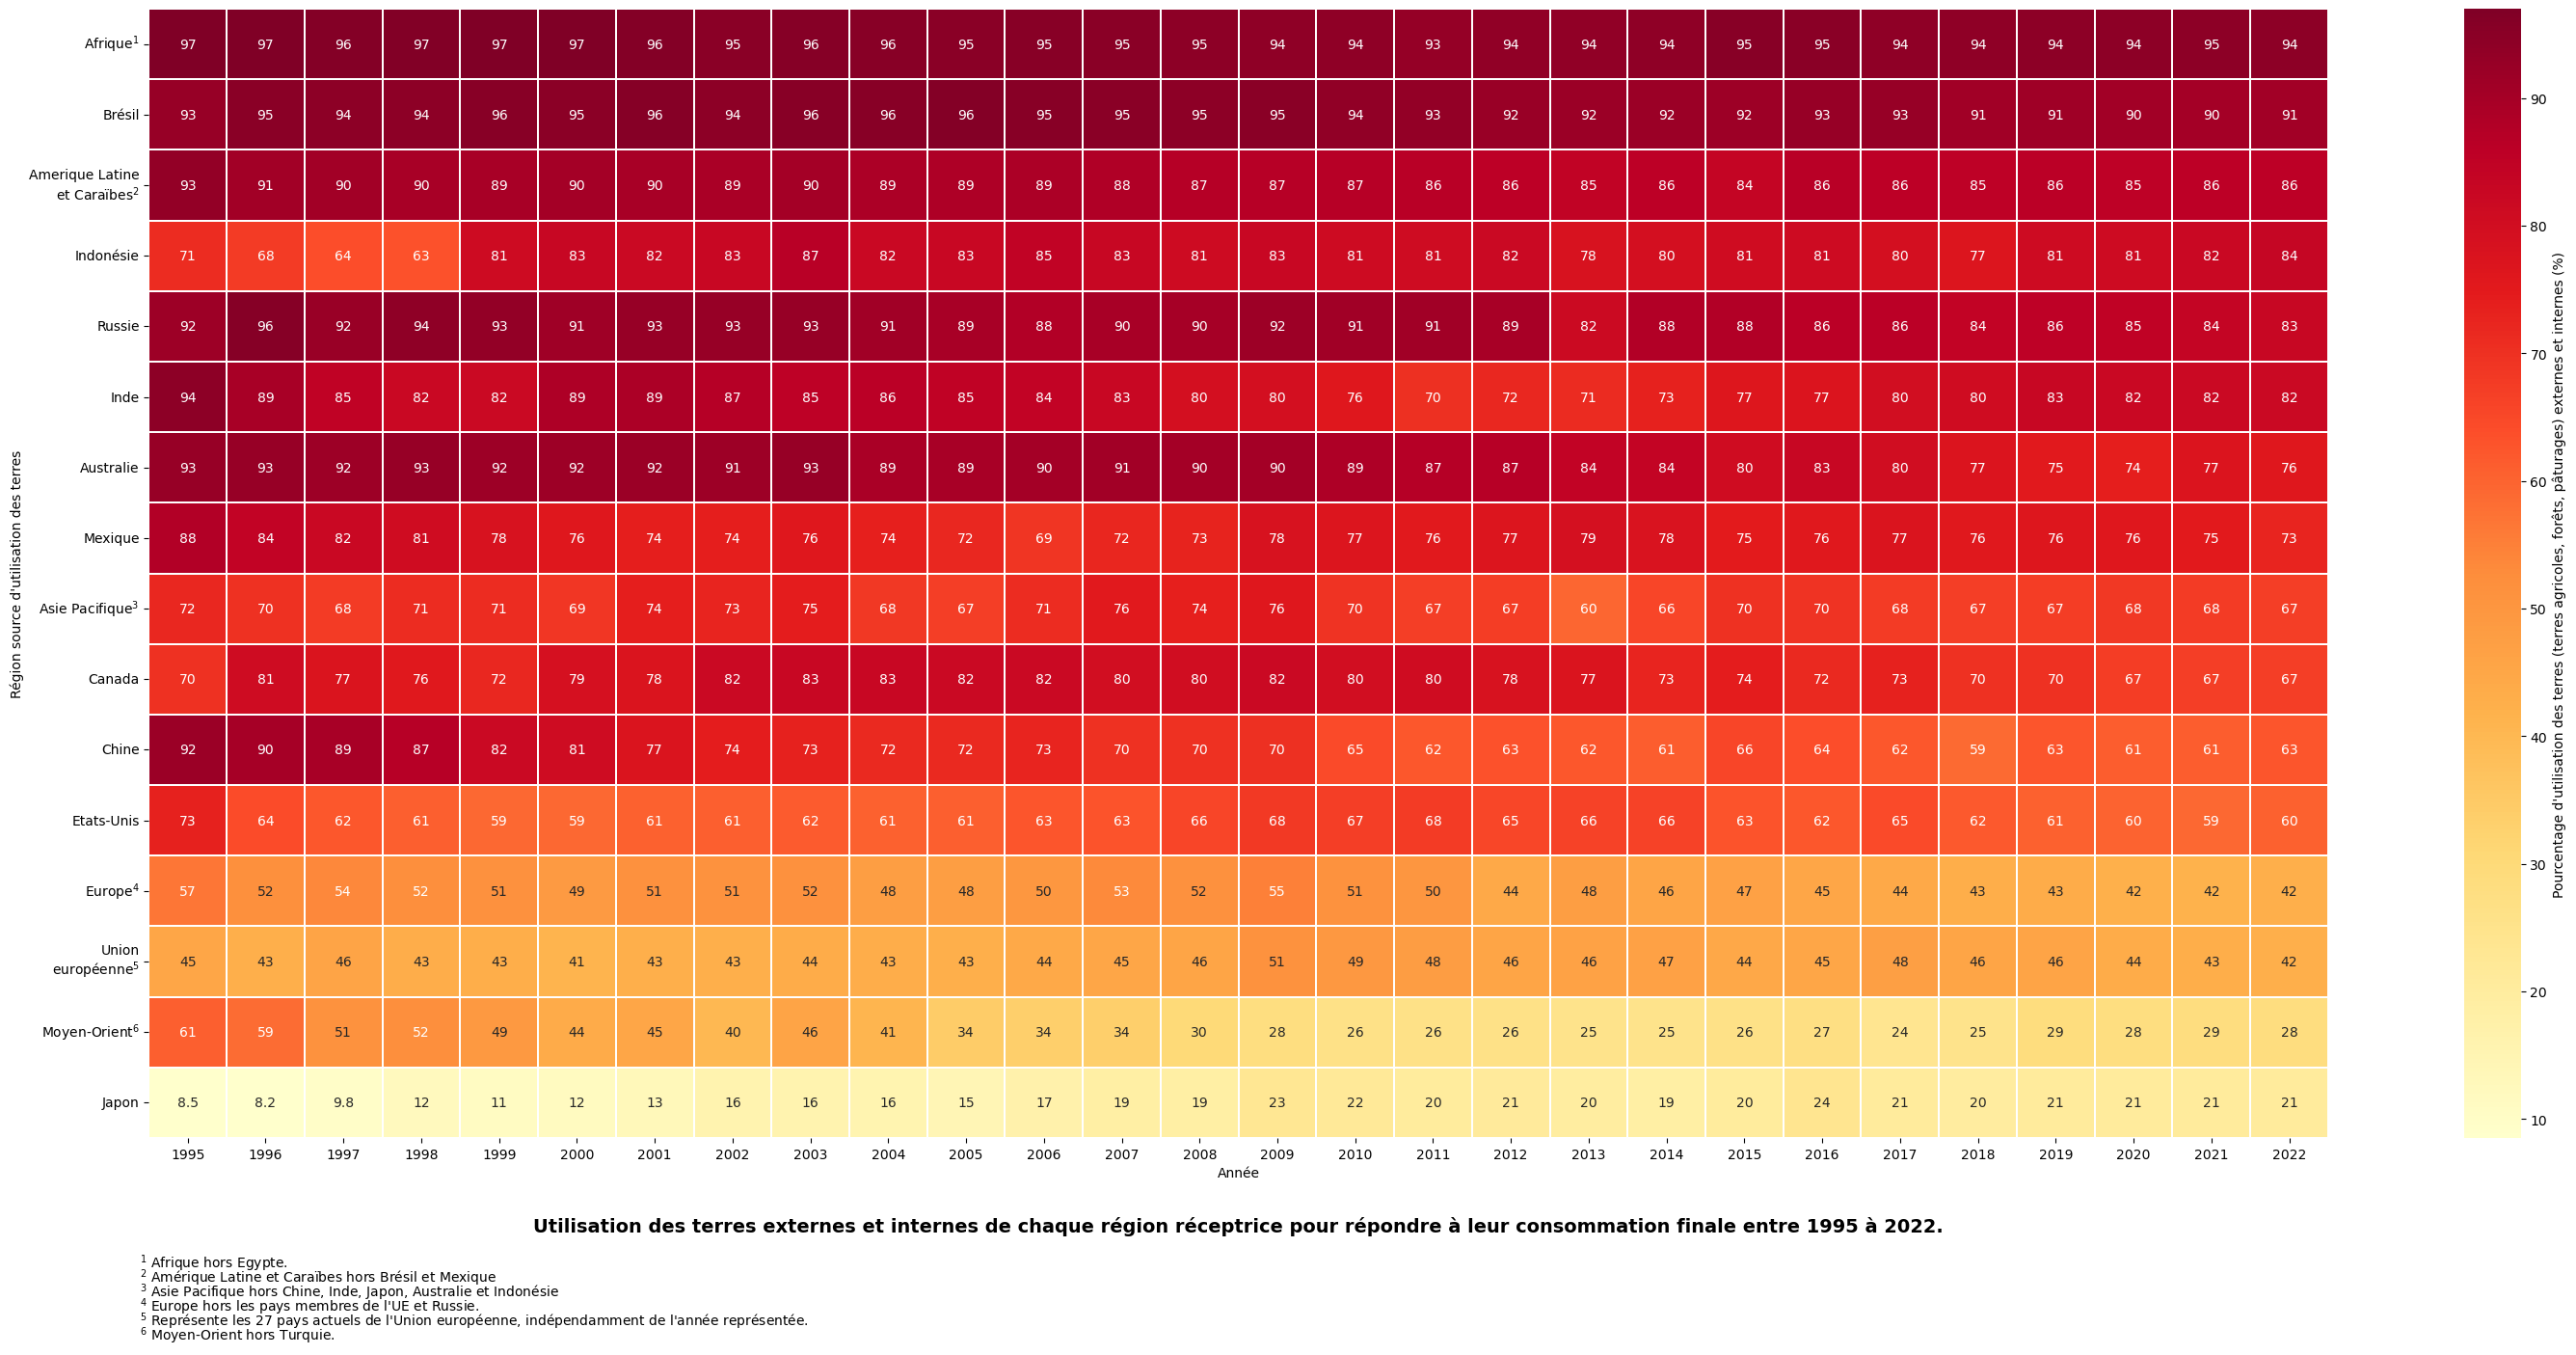

In [19]:
#Création des astériques
regions_ast = ["Afrique$^{1}$","Brésil","Amerique Latine\net Caraïbes$^{2}$", "Indonésie", "Russie", "Inde",  "Australie", "Mexique", 
                   "Asie Pacifique$^{3}$", "Canada",  "Chine","Etats-Unis", "Europe$^{4}$", "Union\neuropéenne$^{5}$",  "Moyen-Orient$^{6}$",  "Japon"]
    
#Modifier le noms des régions des lignes avec la liste 'region_ast'
df_diagonale.index = regions_ast

#Donner un noms aux colonnes et aux lignes
df_diagonale.columns.name = "Année"
df_diagonale.index.name = "Région source d'utilisation des terres"
    
#Modifier la taille de la carte thermique
plt.figure(figsize=(30, 15))
    
#Création d'une carte thermique des DataFrames
sns.heatmap(df_diagonale, vmin=8.5, vmax=97,
            annot=True, cmap='YlOrRd', linewidths=0.1,
            cbar_kws={"label": "Pourcentage d'utilisation des terres (terres agricoles, forêts, pâturages) externes et internes (%)",
                       "format": FuncFormatter(lambda x, _: f'{x:.0f}'), "ticks": range(10, 100, 10)})

#Titre de la carte thermique
plt.title(f"Utilisation des terres externes et internes de chaque région réceptrice pour répondre à leur consommation finale entre 1995 à 2022.", fontsize=14, fontweight='bold', y=-0.09)

#Permet d'ajuster la positions des éléments de la carte thermique
plt.subplots_adjust(bottom=0.3)
    
#Création des notes en bas de pages associées aux astériques
plt.figtext(0.05, 0.07, '$^{1}$ Afrique hors Egypte.', fontsize=10)
plt.figtext(0.05, 0.06, "$^{2}$ Amérique Latine et Caraïbes hors Brésil et Mexique", fontsize=10)
plt.figtext(0.05, 0.05, "$^{3}$ Asie Pacifique hors Chine, Inde, Japon, Australie et Indonésie", fontsize=10)    
plt.figtext(0.05, 0.04, "$^{4}$ Europe hors les pays membres de l'UE et Russie.", fontsize=10)
plt.figtext(0.05, 0.03, "$^{5}$ Représente les 27 pays actuels de l'Union européenne, indépendamment de l'année représentée.", fontsize=10)
plt.figtext(0.05, 0.02, '$^{6}$ Moyen-Orient hors Turquie.', fontsize=10)

#Ajuster l'espacements des éléments de la carte thermique
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    
#Sauvegarder la carte de thermique
frame_filename = f'C:\Master 1\exiobase3-manipulation\Impact - Consommation Finale\LandUse - Consommation Finale\LandUse_AllSectors\LandUse - Heatmap\LandUse_Importation\df_Imp_All.png'
plt.savefig(frame_filename, bbox_inches='tight')

#Afficher la heatmap
plt.show()


Afin de visualiser plus facilement cette évolution, nous avons décidé de créer une carte thermique, qui met en avant facilement le niveau de dépendances de chaque régions. En effet, le rouge vif signifie que la région n'est pas majoritairement dépendante des importation, à l'opposé une couleur froide met en avant que la région est majoritairement dépendante des importations pour les produits issues de l'utilisations des terres.

L'utilisation de l'échelle logarithmique permet d'observer facilement l'évolution de la part des importations pour les régions très dépendantes de la production des autres régions. Cependant, nos valeurs allant de 8,5% à 97% empêchent de voir correctement l'évolution des importations pour les pays faiblement dépendants des importations avec une échelle logarithmique. Pour cela, nous avons divisé cette heatmap en deux.

Nous avons regroupé dans une première carte thermique les régions faiblement dépendantes des importations, telles que l'Afrique, le Brésil, l'Amérique Latine et les Caraïbes, l'Indonésie, la Russie, l'Inde, l'Australie, le Mexique, l'Asie-Pacifique, le Canada et la Chine, avec lesqules nous allons visualiser les données sans utiliser l'échelle logarithmique. Dans une seconde carte thermique, nous avons regroupé les régions fortement dépendantes des importations, telles que les États-Unis, l'Europe, l'Union européenne, le Moyen-Orient et le Japon en utilisant une échelle logarithmique.

In [29]:
#Creation d'une nouvelle DataFrame avec les 11 premières lignes de la DataFrame 'df_diagonale'
df2 = df_diagonale.head(11)

#Creation d'une nouvelle DataFrame avec les 5 dernières lignes de la DataFrame 'df_diagonale'
df3 = df_diagonale.tail(5)


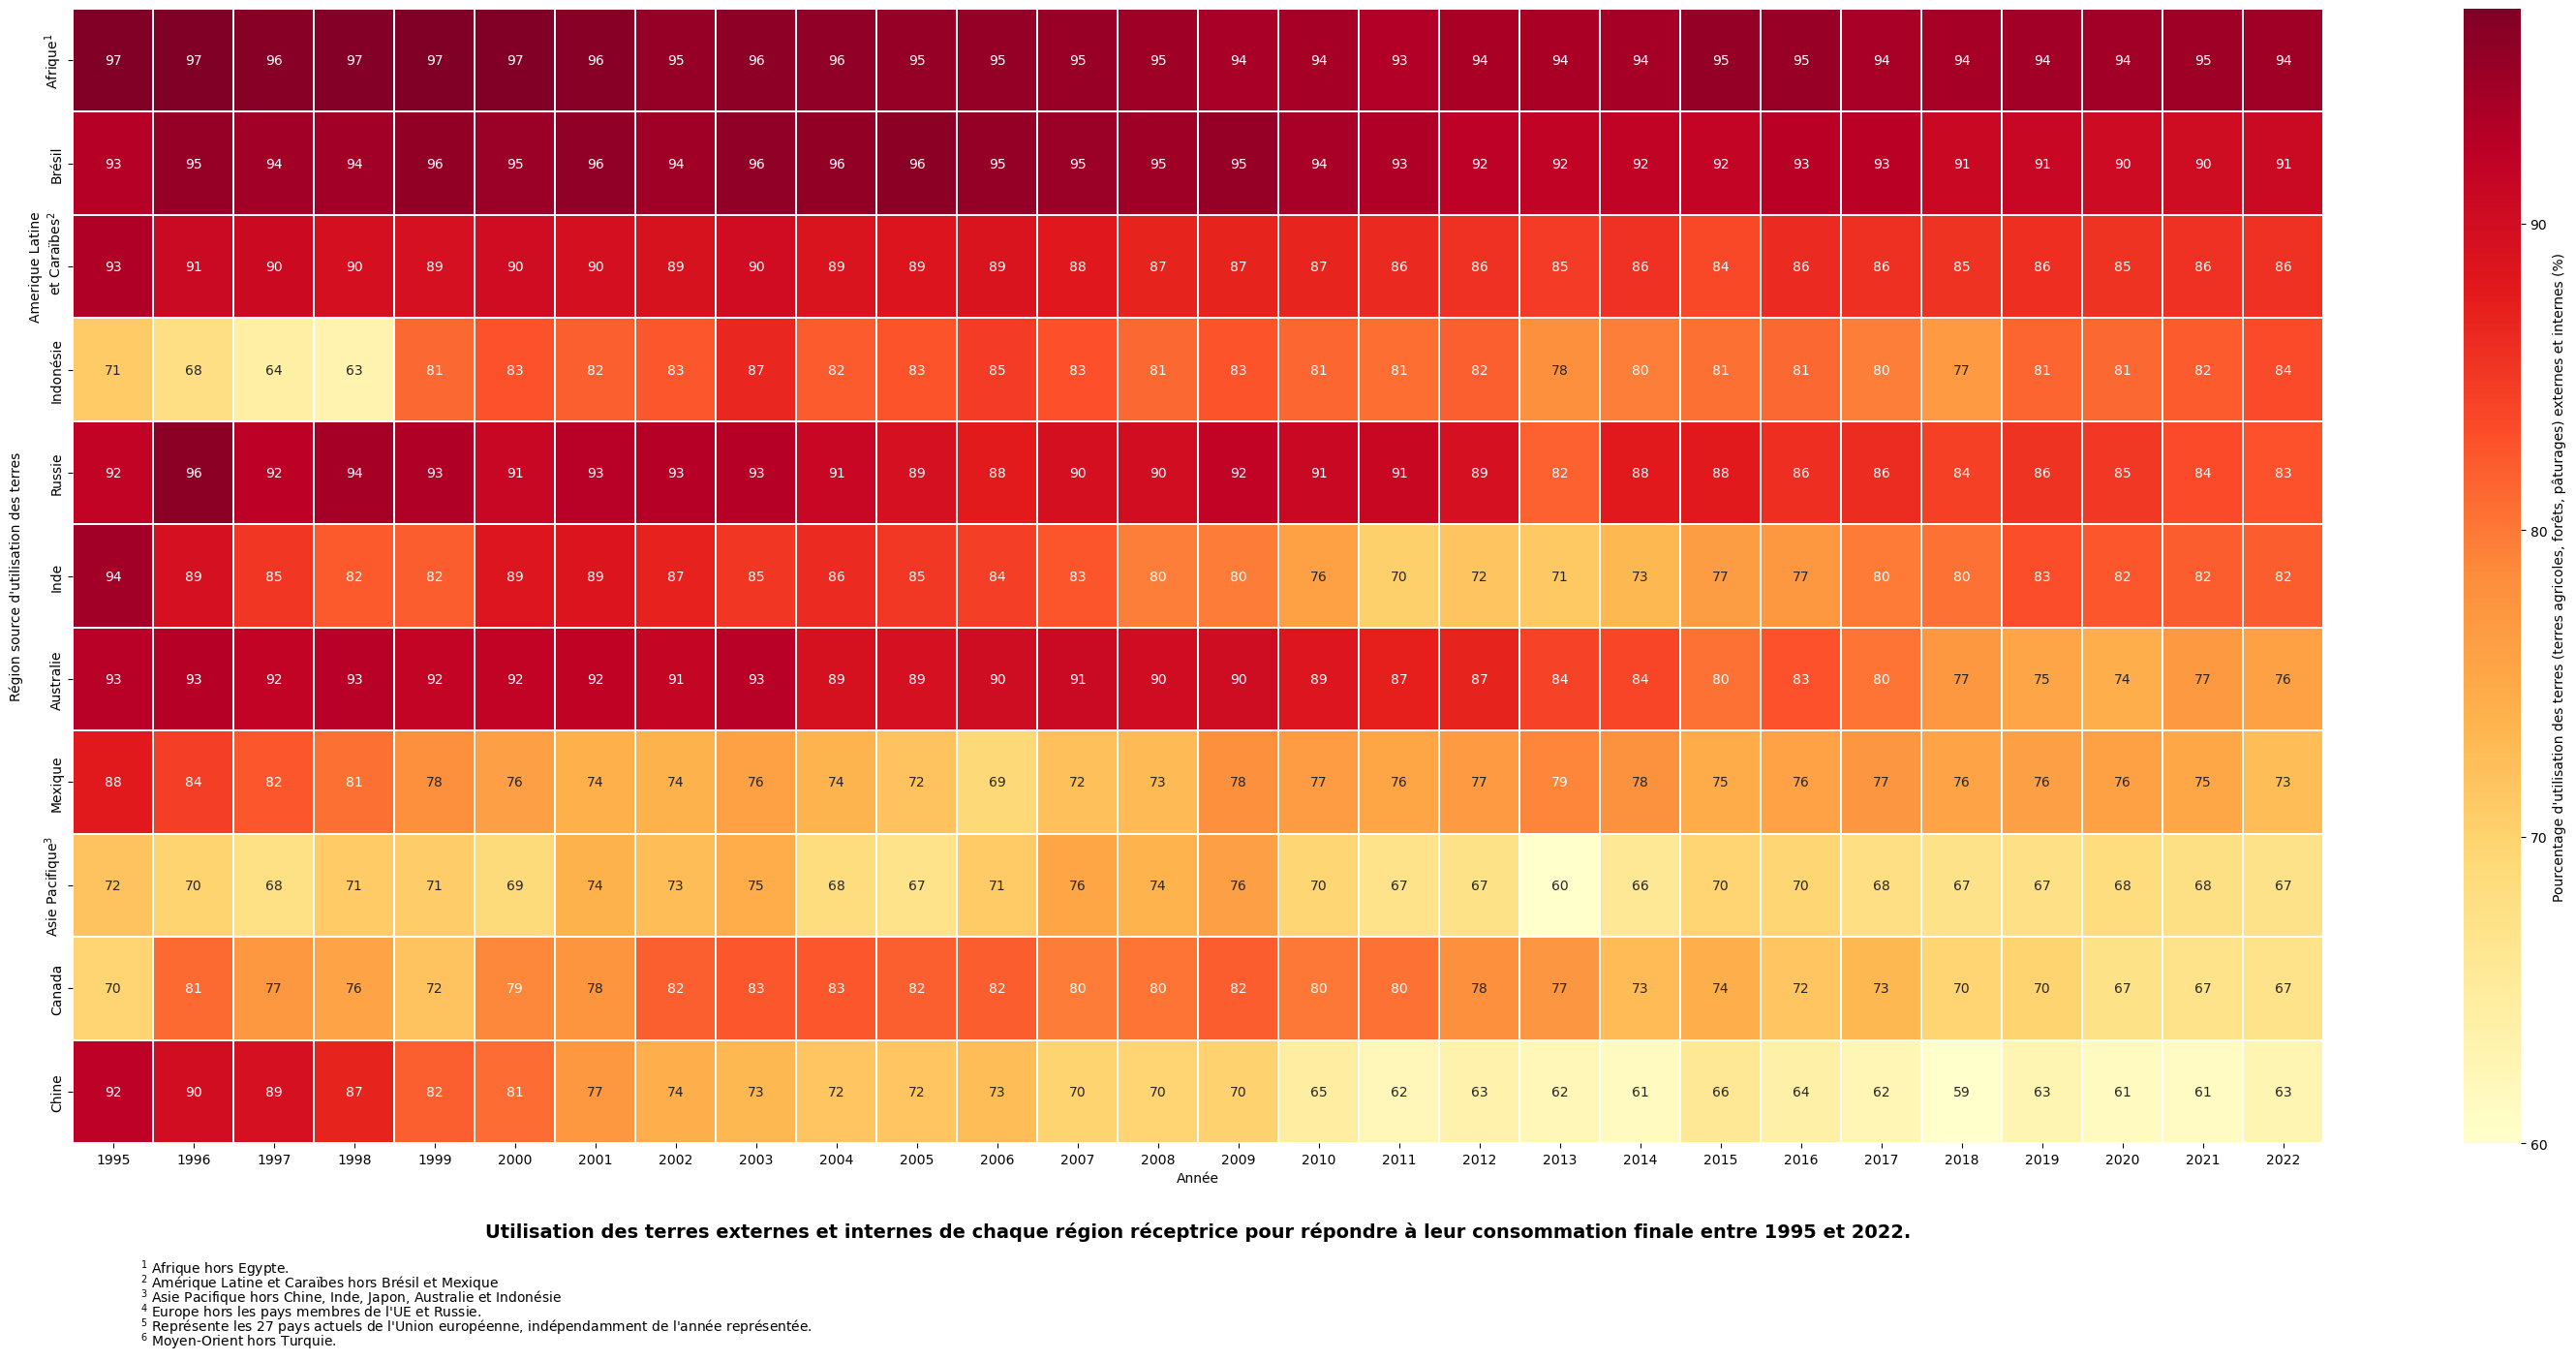

In [30]:
#Création d'astériques
regions_ast = ["Afrique$^{1}$","Brésil","Amerique Latine\net Caraïbes$^{2}$", "Indonésie", "Russie", "Inde",  "Australie", "Mexique", 
                   "Asie Pacifique$^{3}$", "Canada",  "Chine"]
    

#Modifier le noms des régions des lignes avec la liste 'region_ast'
df2.index = regions_ast

#Donner un label aux colonnes et aux lignes
df2.columns.name = "Année"
df2.index.name = "Région source d'utilisation des terres"
    
#Modifier la taille de la carte thermique
plt.figure(figsize=(30, 15))
    
#Création d'une carte thermique des DataFrames
sns.heatmap(df2, vmin=60, vmax=97,
            annot=True, cmap='YlOrRd', linewidths=0.1,
            cbar_kws={"label": "Pourcentage d'utilisation des terres (terres agricoles, forêts, pâturages) externes et internes (%)",
                       "format": FuncFormatter(lambda x, _: f'{x:.0f}'), "ticks": range(10, 100, 10)})

#Titre de la carte thermique
plt.title(f"Utilisation des terres externes et internes de chaque région réceptrice pour répondre à leur consommation finale entre 1995 et 2022.", fontsize=14, fontweight='bold', y=-0.09)

#Permet d'ajuster la positions des éléments de la carte thermique
plt.subplots_adjust(bottom=0.3)
    
#Création des notes en bas de pages associées aux astériques
plt.figtext(0.05, 0.07, '$^{1}$ Afrique hors Egypte.', fontsize=10)
plt.figtext(0.05, 0.06, "$^{2}$ Amérique Latine et Caraïbes hors Brésil et Mexique", fontsize=10)
plt.figtext(0.05, 0.05, "$^{3}$ Asie Pacifique hors Chine, Inde, Japon, Australie et Indonésie", fontsize=10)    
plt.figtext(0.05, 0.04, "$^{4}$ Europe hors les pays membres de l'UE et Russie.", fontsize=10)
plt.figtext(0.05, 0.03, "$^{5}$ Représente les 27 pays actuels de l'Union européenne, indépendamment de l'année représentée.", fontsize=10)
plt.figtext(0.05, 0.02, '$^{6}$ Moyen-Orient hors Turquie.', fontsize=10)

#Ajuster l'espacements des éléments de la carte thermique
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    
#Sauvegarder la carte de thermique
frame_filename = f'C:\Master 1\exiobase3-manipulation\Impact - Consommation Finale\LandUse - Consommation Finale\LandUse_AllSectors\LandUse - Heatmap\LandUse_Importation\df_Imp_High.png'
plt.savefig(frame_filename, bbox_inches='tight')

#Afficher la heatmap
plt.show()


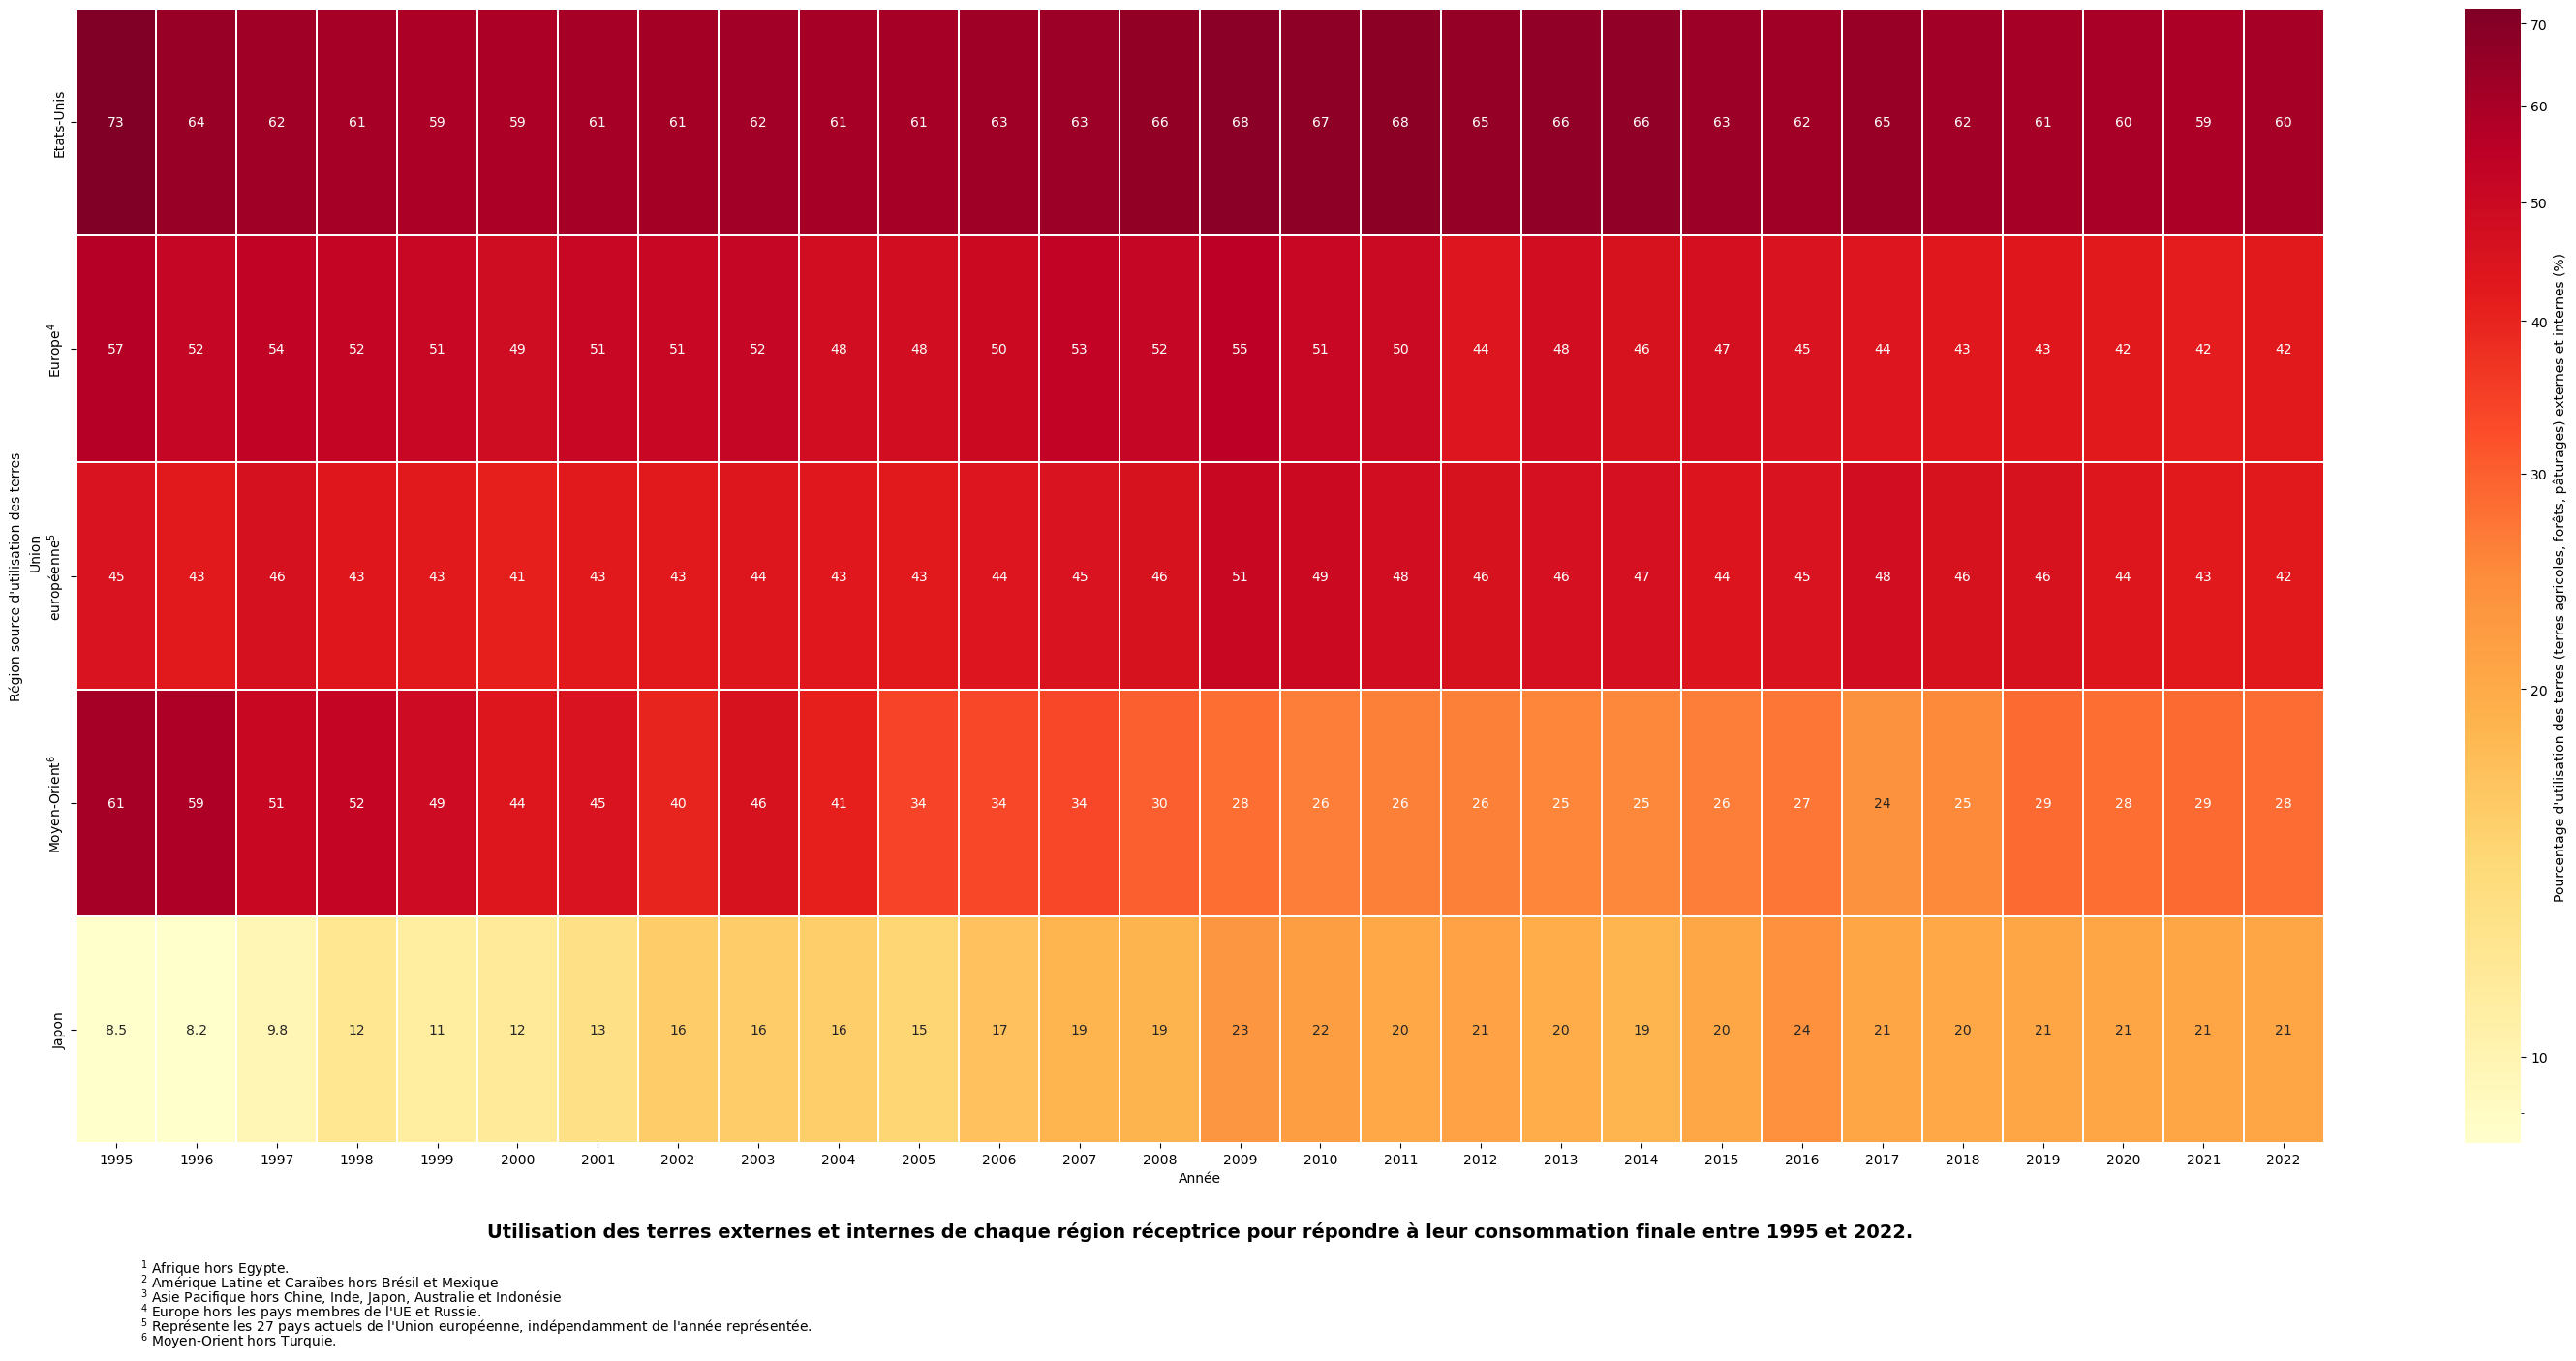

In [22]:
#Création d'astériques
regions_ast = ["Etats-Unis", "Europe$^{4}$", "Union\neuropéenne$^{5}$",  "Moyen-Orient$^{6}$",  "Japon"]
    
#Modifier le noms des régions des lignes avec la liste 'region_ast'
df3.index = regions_ast

#Donner un noms aux colonnes et aux lignes
df3.columns.name = "Année"
df3.index.name = "Région source d'utilisation des terres"
    
#Modifier la taille de la carte thermique
plt.figure(figsize=(30, 15))
    
#Création d'une carte thermique des DataFrames
sns.heatmap(df3, norm=LogNorm(vmin=8.5, vmax=72),
            annot=True, cmap='YlOrRd', linewidths=0.1,
            cbar_kws={"label": "Pourcentage d'utilisation des terres (terres agricoles, forêts, pâturages) externes et internes (%)",
                       "format": FuncFormatter(lambda x, _: f'{x:.0f}'), "ticks": range(10, 100, 10)})

#Titre de la carte thermique
plt.title(f"Utilisation des terres externes et internes de chaque région réceptrice pour répondre à leur consommation finale entre 1995 et 2022.", fontsize=14, fontweight='bold', y=-0.09)

#Permet d'ajuster la positions des éléments de la carte thermique
plt.subplots_adjust(bottom=0.3)
    
#Création des notes en bas de pages associées aux astériques    
plt.figtext(0.05, 0.07, '$^{1}$ Afrique hors Egypte.', fontsize=10)
plt.figtext(0.05, 0.06, "$^{2}$ Amérique Latine et Caraïbes hors Brésil et Mexique", fontsize=10)
plt.figtext(0.05, 0.05, "$^{3}$ Asie Pacifique hors Chine, Inde, Japon, Australie et Indonésie", fontsize=10)    
plt.figtext(0.05, 0.04, "$^{4}$ Europe hors les pays membres de l'UE et Russie.", fontsize=10)
plt.figtext(0.05, 0.03, "$^{5}$ Représente les 27 pays actuels de l'Union européenne, indépendamment de l'année représentée.", fontsize=10)
plt.figtext(0.05, 0.02, '$^{6}$ Moyen-Orient hors Turquie.', fontsize=10)

#Ajuster l'espacements des éléments de la carte thermique
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    
#Sauvegarder la carte de thermique
frame_filename = f'C:\Master 1\exiobase3-manipulation\Impact - Consommation Finale\LandUse - Consommation Finale\LandUse_AllSectors\LandUse - Heatmap\LandUse_Importation\df_Imp_Low.png'
plt.savefig(frame_filename, bbox_inches='tight')

#Afficher la heatmap
plt.show()


Pour clarifier, nous allons par la suite simplifier nos cartes thermiques en ne conservant que les pays dont la part des importations varie considérablement dans le temps.

Pour la première carte thermique, qui montre les régions moins dépendantes des importations en 2022, nous représenteront l'Indonésie, l'Inde, l'Australie, le Mexique, l'Asie-Pacifique, le Canada et la Chine. Nous gardons ces régions car nous avons pu observer dans la carte thermique précedente une instabilité dans leur dépendance aux importations entre 1995 et 2022. En revanche, des régions comme l'Afrique, le Brésil et l'Amérique Latine montrent une dépendance relativement faible et stable aux importations au fil du temps.

Pour la seconde carte thermique, qui représente les régions les plus dépendantes des importations en 2022, nous ne garderons que le Moyen-Orient et le Japon. Nous avons choisi ces régions en raison de la variation de leur dépendance aux importations au cours du temps, contrairement à des régions comme les États-Unis et l'Europe où cette dépendance varie peu.

In [25]:
#Liste des régions que l'on veut garder dans nos DataFrame
index = ["Indonésie", "Inde", "Australie", "Mexique", "Canada", "Chine"]
index1 = ["Moyen-Orient", "Japon"]

#DataFrame avec les pays dans la liste 'index'
df4 = df_diagonale.loc[index]

#DataFrame avec les pays dans la liste 'index1'
df5 = df_diagonale.loc[index1]

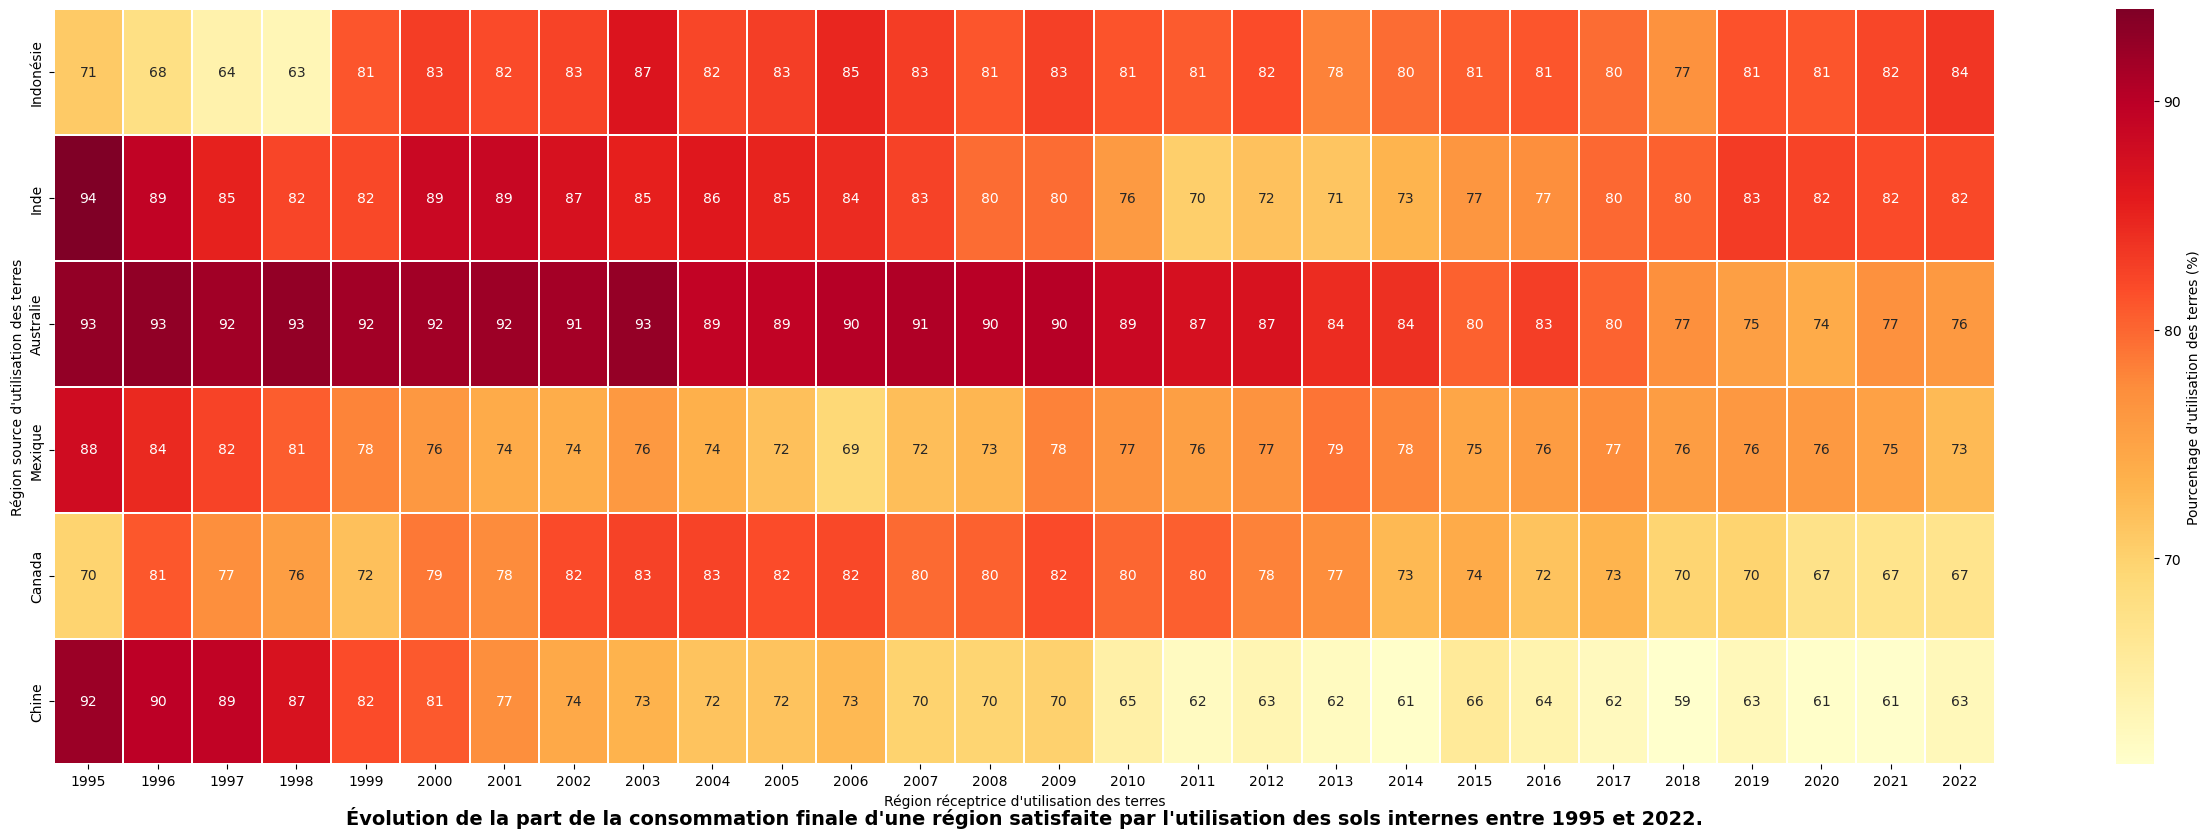

In [26]:
#Donner un noms aux colonnes et aux lignes
df4.columns.name = "Année"
df4.index.name = "Région source d'utilisation des terres"
    
    
#Modifier la taille de la carte thermique
plt.figure(figsize=(25, 10))
    
#Création d'une carte thermique des DataFrames
sns.heatmap(df4, vmin=61, vmax=94,
            annot=True, cmap='YlOrRd', linewidths=0.1,
            cbar_kws={"label": "Pourcentage d'utilisation des terres (%)",
                       "format": FuncFormatter(lambda x, _: f'{x:.0f}'), "ticks": range(10, 100, 10)})

#Titre de la carte thermique
plt.title(f"Évolution de la part de la consommation finale d'une région satisfaite par l'utilisation des sols internes entre 1995 et 2022.", fontsize=14, fontweight='bold', y=-0.09)

#Ajuster l'espacements des éléments de la carte thermique
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    
#Sauvegarder la carte de thermique
frame_filename = f'C:\Master 1\exiobase3-manipulation\Impact - Consommation Finale\LandUse - Consommation Finale\LandUse_AllSectors\LandUse - Heatmap\LandUse_Importation\df_Imp_HighSorted.png'
plt.savefig(frame_filename, bbox_inches='tight')

#Afficher la heatmap
plt.show()


Ces six régions font partie de celles qui dépendent le moins des importations. Par exemple, en 2022, seulement 16% des terres utilisées pour répondre à leur consommation finale en Indonésie provenaient de l'extérieur du pays. L'Indonésie a également réduit sa dépendance aux importations au fil du temps avec une diminution de 13 points de pourcentage dans l'utilisation des terres importées entre 1995 et 2022.

En revanche, d'autres régions comme l'Inde, l'Australie, le Mexique et la Chine ont vu leur dépendance aux importations de terres augmenter considérablement sur la même période. Par exemple, la Chine a vu une augmentation de 29 points de pourcentage dans l'utilisation des terres externes pour répondre à sa consommation finale.

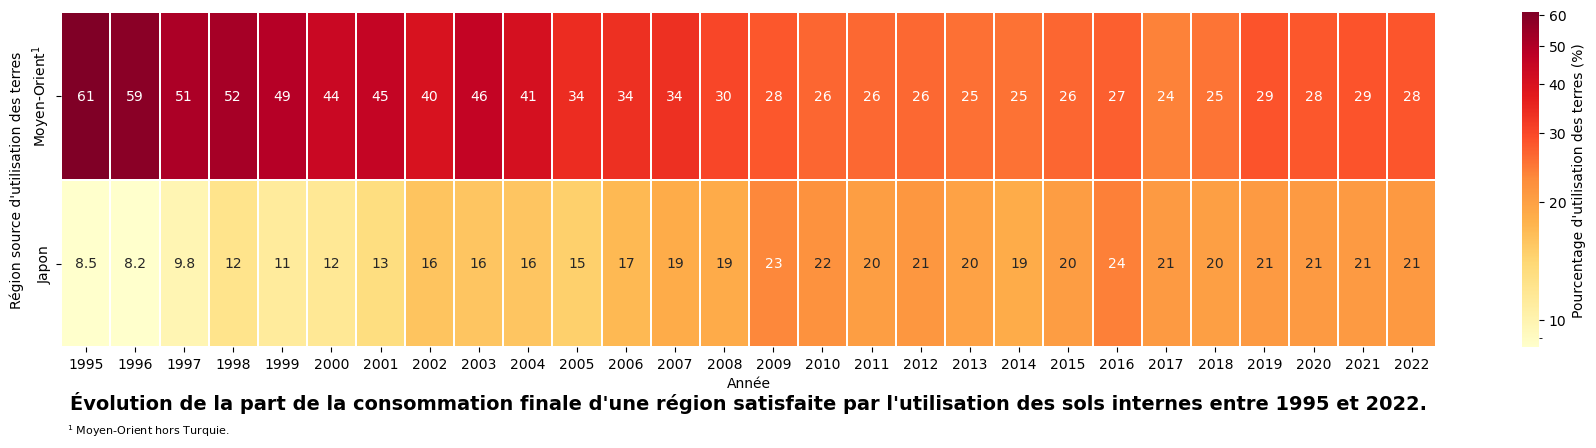

In [27]:
#Création d'astériques
regions_ast = ["Moyen-Orient$^{1}$",  "Japon"]
    
#Modifier le noms des régions des lignes avec la liste 'region_ast'
df5.index = regions_ast

#Donner un noms aux colonnes et aux lignes
df5.columns.name = "Année"
df5.index.name = "Région source d'utilisation des terres"
    
#Modifier la taille de la carte thermique
plt.figure(figsize=(18, 5))
    
#Création d'une carte thermique des DataFrames
sns.heatmap(df5, norm=LogNorm(vmin=8.5, vmax=61),
            annot=True, cmap='YlOrRd', linewidths=0.1,
            cbar_kws={"label": "Pourcentage d'utilisation des terres (%)",
                       "format": FuncFormatter(lambda x, _: f'{x:.0f}'), "ticks": range(10, 100, 10)})

#Titre de la carte thermique
plt.title(f"Évolution de la part de la consommation finale d'une région satisfaite par l'utilisation des sols internes entre 1995 et 2022.", fontsize=14, fontweight='bold', y=-0.21)

#Permet d'ajuster la positions des éléments de la carte thermique
plt.subplots_adjust(bottom=0.3)
    
#Création des notes en bas de pages associées aux astériques
plt.figtext(0.04, 0.07, '$^{1}$ Moyen-Orient hors Turquie.', fontsize=8)

#Ajuster l'espacements des éléments de la carte thermique
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    
#Sauvegarder la carte de thermique
frame_filename = f'C:\Master 1\exiobase3-manipulation\Impact - Consommation Finale\LandUse - Consommation Finale\LandUse_AllSectors\LandUse - Heatmap\LandUse_Importation\df_Imp_LowSorted_Perc.png'
plt.savefig(frame_filename, bbox_inches='tight')

#Afficher la heatmap
plt.show()


Ces deux régions font partie des régions les plus dépendantes de l'exploitation de terres externes à leur région pour répondre à leur consommation finale en 2022. Par exemple, le Japon montre une forte dépendance aux importations depuis 1995, bien que cette dépendance ait diminué de 12.5 points de pourcentage entre 1995 et 2022.

A l'opposé de la tendance du Japon, le Moyen-Orient était initialement une région qui n'utilisait que 39% de terres externes à leur territoires pour répondre à leur consommation finale en 1995, mais cette proportion a considérablement augmenté à 72% en 2022, soit une augmentation de 33 points de pourcentage.